In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,classification_report,plot_confusion_matrix,plot_roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [2]:
test = pd.read_csv("../Data/test_data.csv")
train = pd.read_csv("../Data/train_data.csv")

In [3]:
cols_to_encode= ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
labelencoder = LabelEncoder()

for col in cols_to_encode:
    train[col] = labelencoder.fit_transform(train[col])

In [4]:
train.drop(['Id'],axis=1,inplace=True)

In [5]:
train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [6]:
X = train.drop('Risk_Flag',axis=1)
y = train['Risk_Flag']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)

<AxesSubplot:>

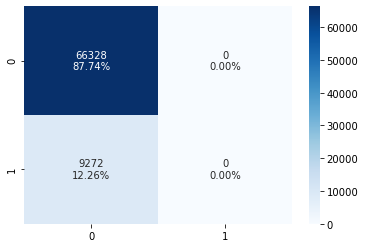

In [10]:
dct_cfm = confusion_matrix(y_test,lr_predictions)

group_counts = ['{0:0.0f}'.format(value) for value in
                dct_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dct_cfm.flatten()/np.sum(dct_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dct_cfm, annot=labels, fmt='', cmap='Blues')

In [11]:
accuracy_score(y_test, lr_predictions)


0.8773544973544973

In [12]:
recall_score(y_test, lr_predictions)

0.0

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

<AxesSubplot:>

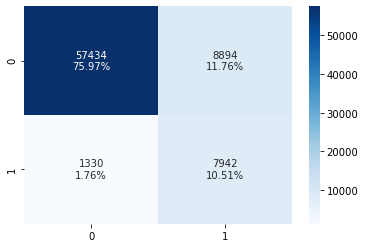

In [14]:
dct_cfm = confusion_matrix(y_test,pred)

group_counts = ['{0:0.0f}'.format(value) for value in
                dct_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dct_cfm.flatten()/np.sum(dct_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dct_cfm, annot=labels, fmt='', cmap='Blues')

In [15]:
accuracy_score(y_test, pred)

0.8647619047619047

In [16]:
recall_score(y_test, pred)

0.8565573770491803